In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import LocalOutlierFactor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

## Exploration

In [183]:
df=pd.read_csv('Desktop/graduation project/Hr graduation project.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [185]:
len(df[df.duplicated()])

0

In [186]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


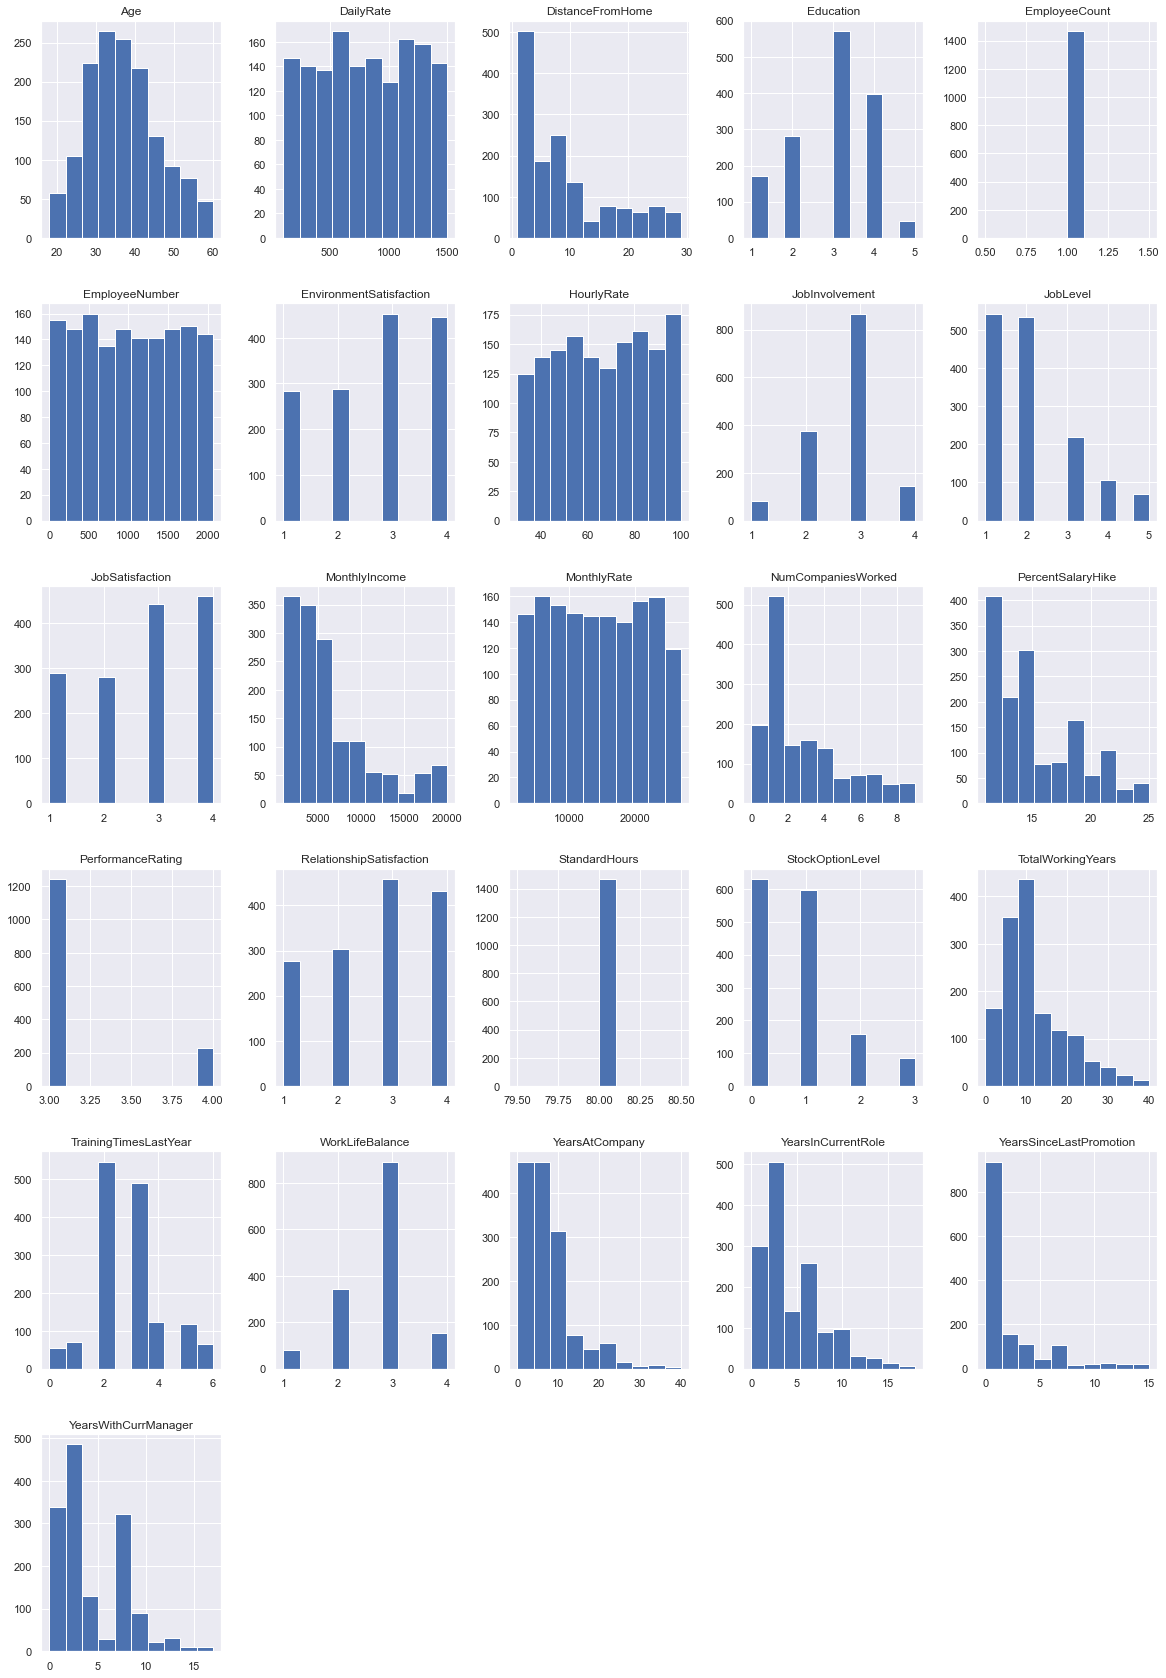

In [188]:
df.hist(figsize=(20, 30))
plt.show()

In [189]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

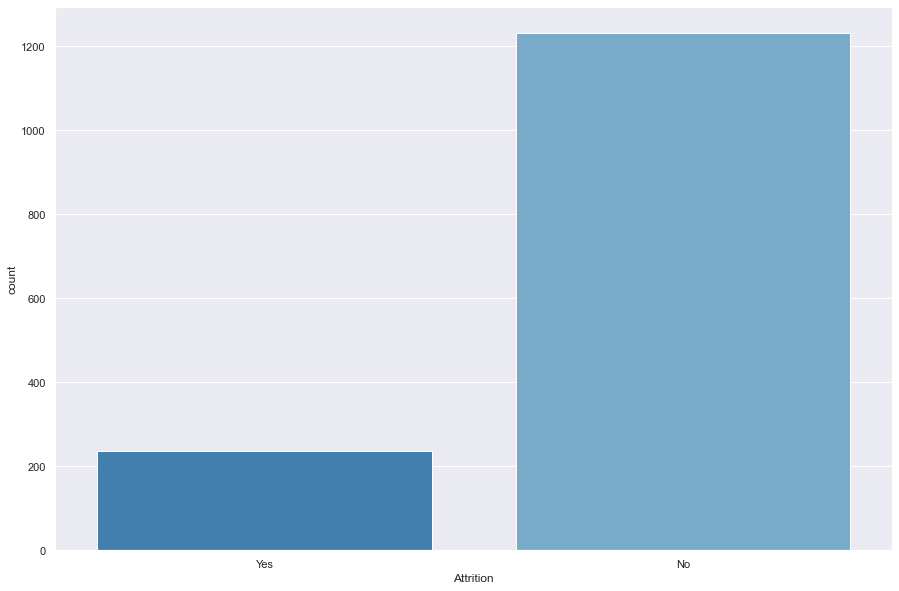

In [190]:
sns.countplot(x=df.Attrition, palette='tab20c')
plt.show()

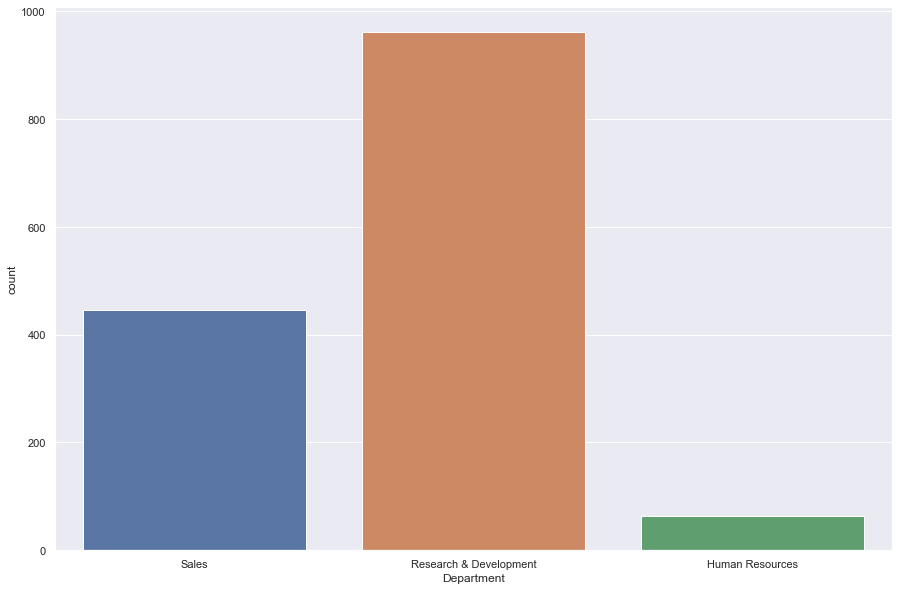

In [191]:
sns.countplot(x=df["Department"])
plt.show()

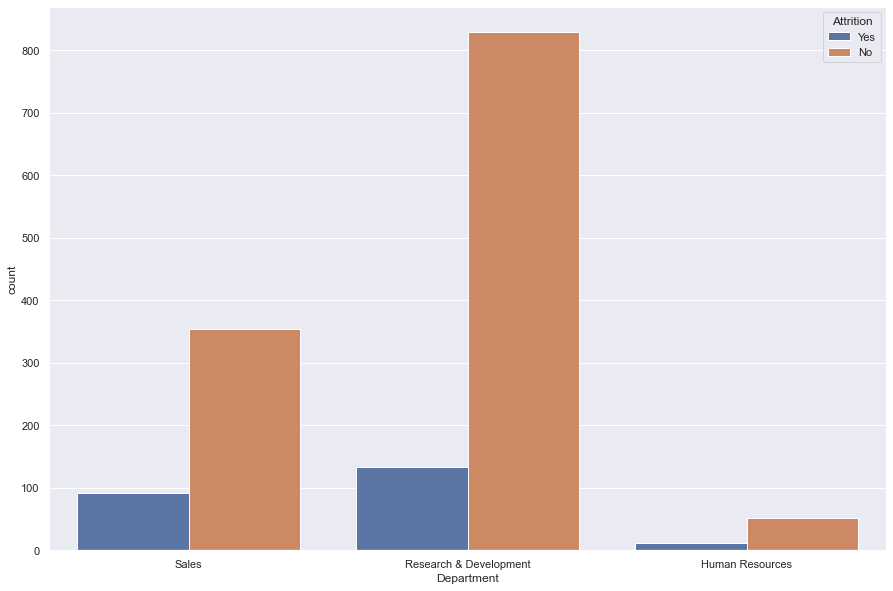

In [192]:
sns.countplot(x=df["Department"], hue=df.Attrition)
plt.show()

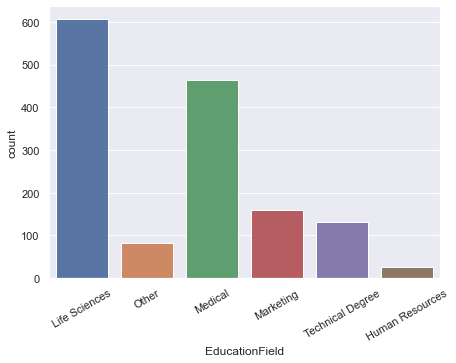

In [193]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x=df["EducationField"])
plt.xticks(rotation=30)
plt.show()

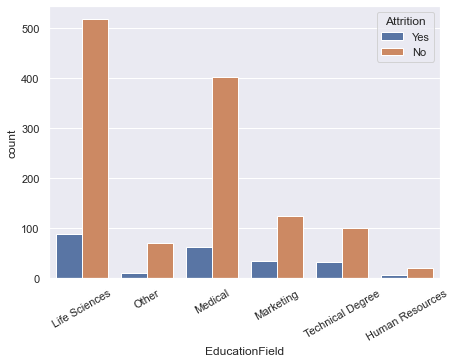

In [194]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x=df["EducationField"], hue=df.Attrition)
plt.xticks(rotation=30)
plt.show()

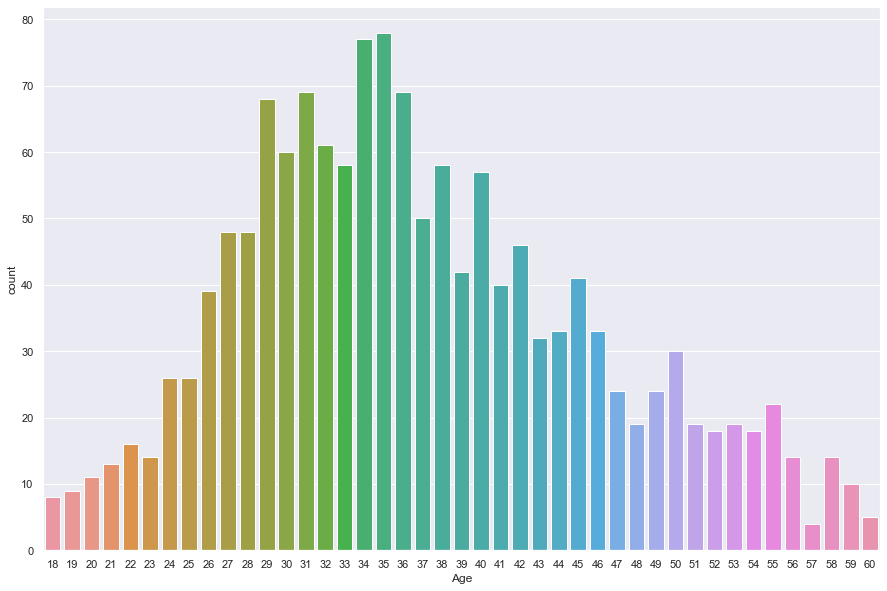

In [195]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=df.Age)
plt.show()

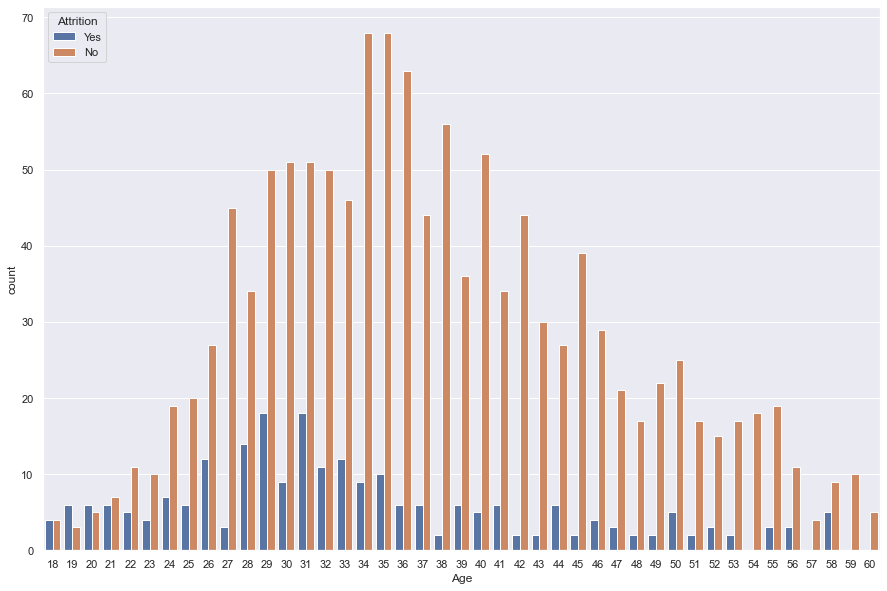

In [196]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=df.Age, hue=df.Attrition)
plt.show()

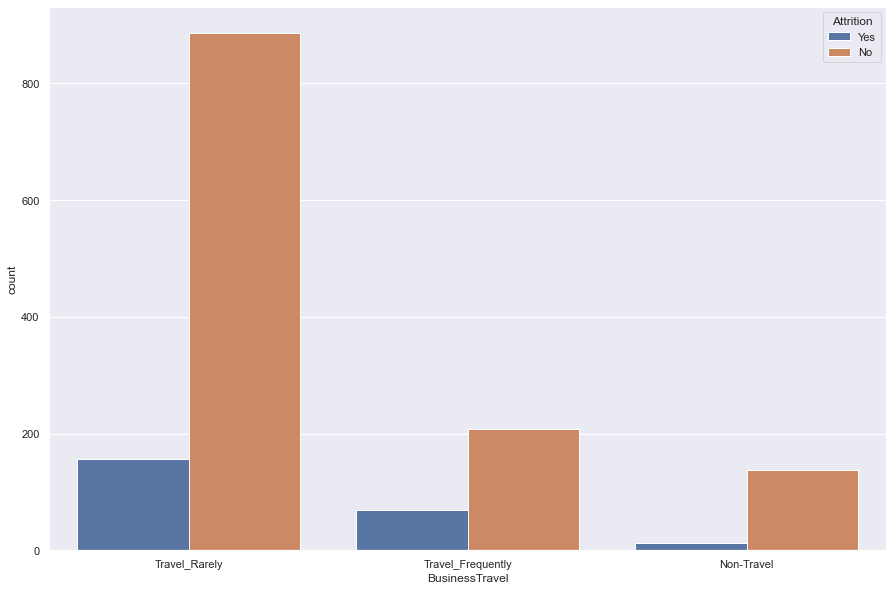

In [197]:
sns.countplot(x=df.BusinessTravel, hue=df.Attrition)
plt.show()

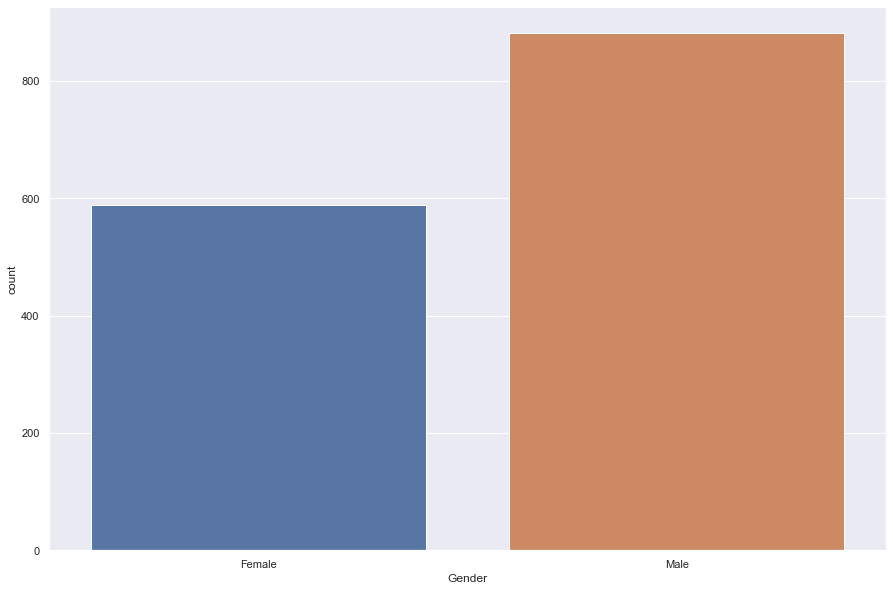

In [198]:
sns.countplot(x=df.Gender)
plt.show()

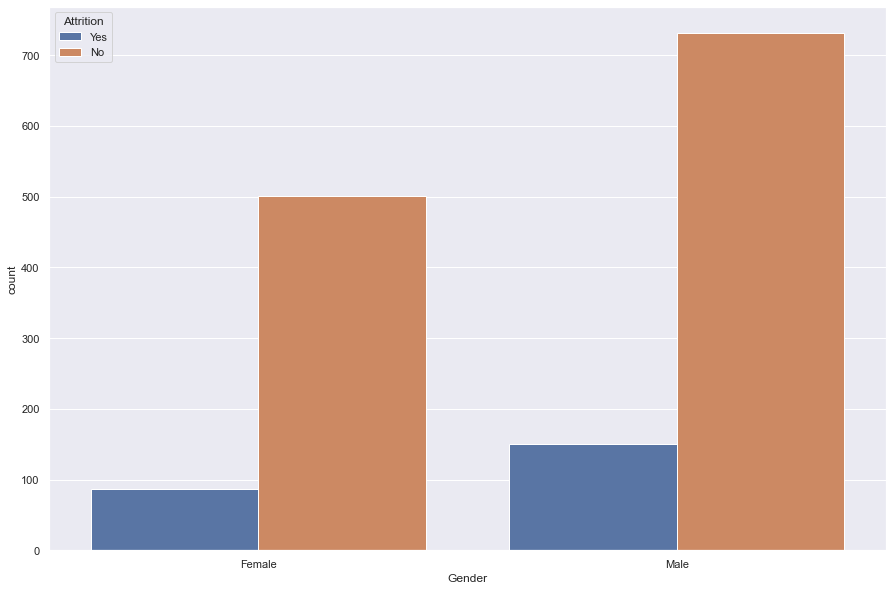

In [199]:
sns.countplot(x=df.Gender, hue=df.Attrition)
plt.show()

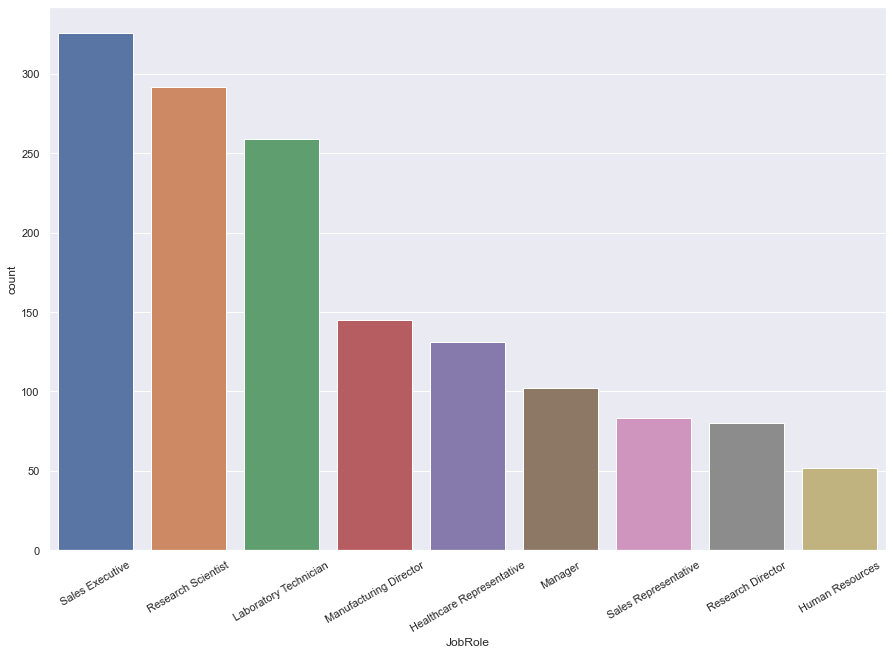

In [200]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=df.JobRole)
plt.xticks(rotation=30)
plt.show()

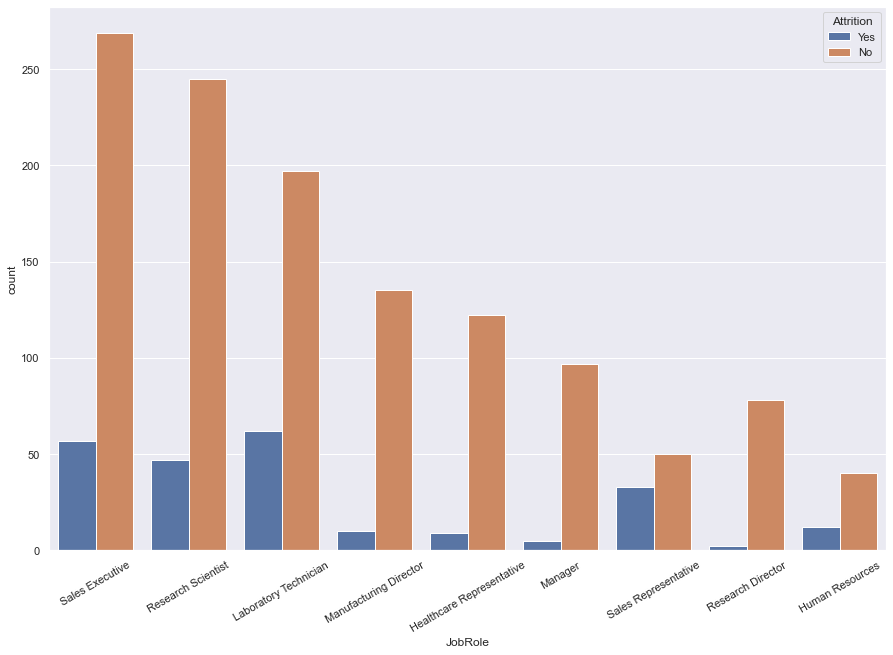

In [201]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=df.JobRole, hue=df.Attrition)
plt.xticks(rotation=30)
plt.show()

In [235]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,0.000000,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,2.079442,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,0.693147,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,1.098612,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,0.693147,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


In [236]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.023986,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.076393,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.003481,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.023986,0.076393,-0.003481,1.000000,0.016378,NaN,0.033531,-0.008126,0.008881,0.013341,...,0.022706,-0.048337,-0.007408,-0.017397,-0.015986,0.043085,-0.001910,0.012678,0.013403,-0.025624
Education,0.208034,-0.031373,-0.016806,0.016378,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.033531,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,...,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.008126,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.011716,0.008881,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,0.023381,0.013341,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436


<AxesSubplot:title={'center':'Correlation Plot'}>

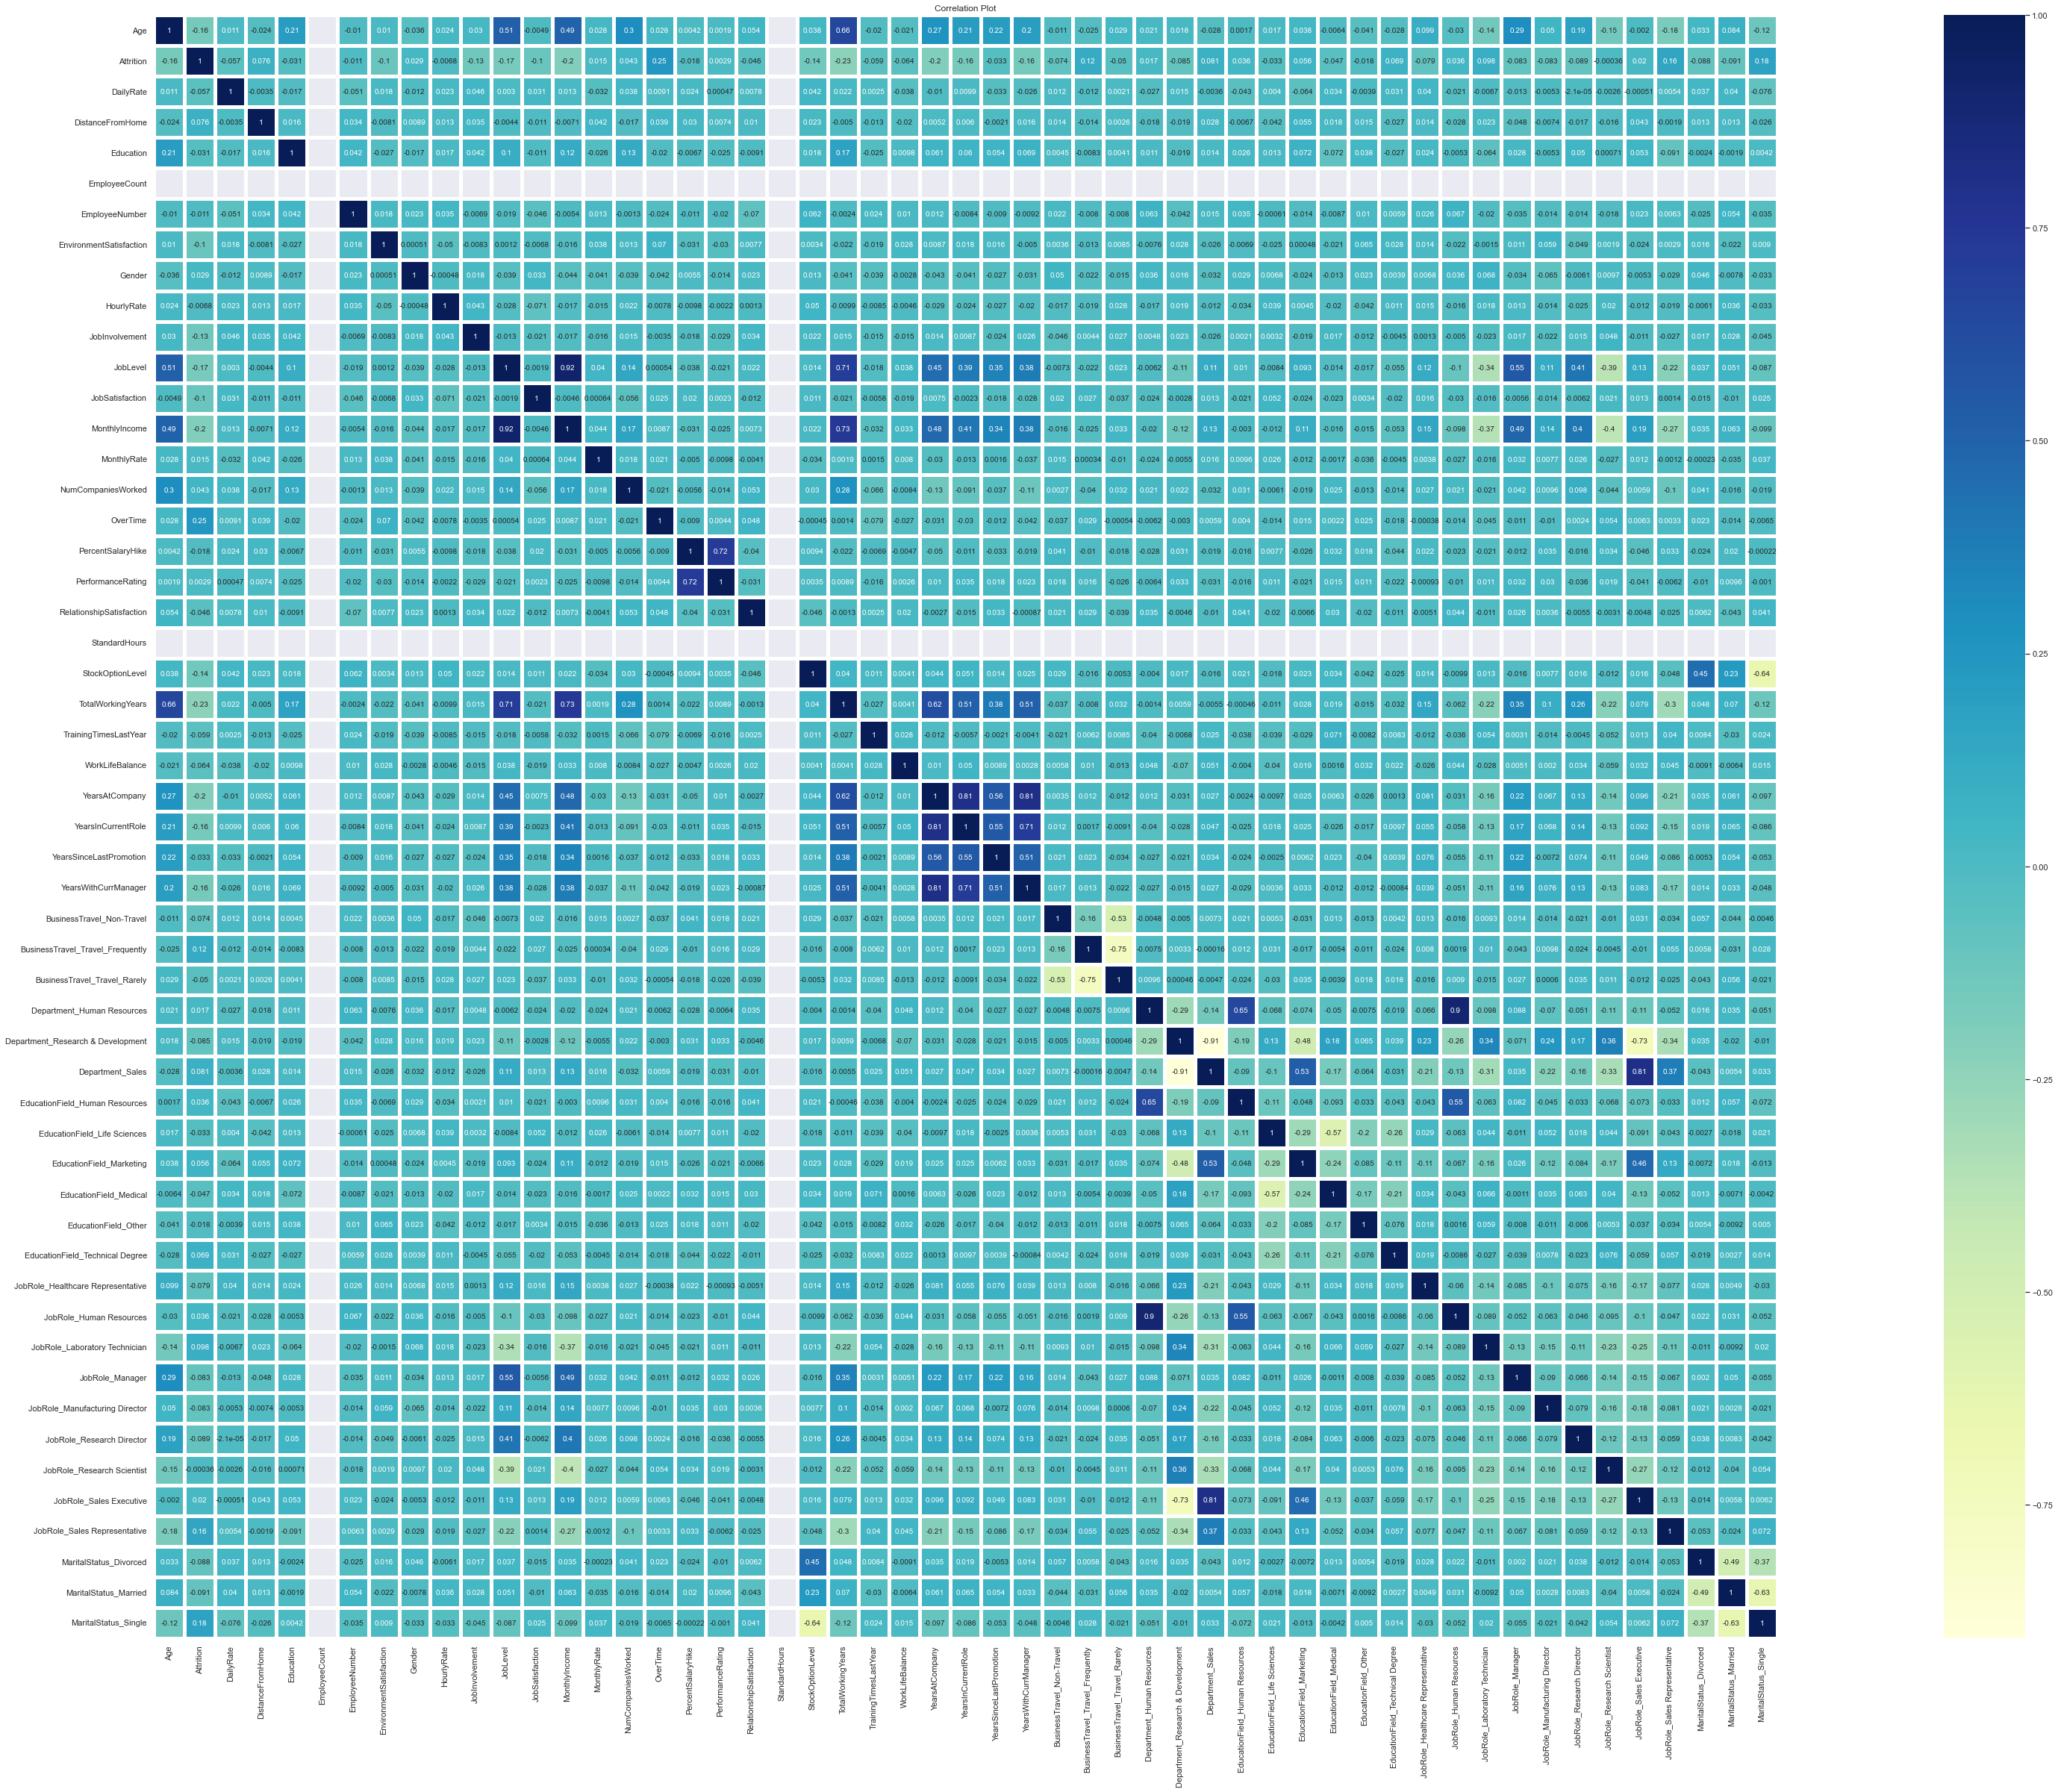

In [238]:
plt.figure(figsize=(80,40))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

## Preprocessing

In [203]:
trans_features = ['DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany']

In [204]:
for feature in trans_features:
    if df[feature].min() == 0:
        df[feature] = np.log(df[feature] + 1)
    else:
        df[feature] = np.log(df[feature])

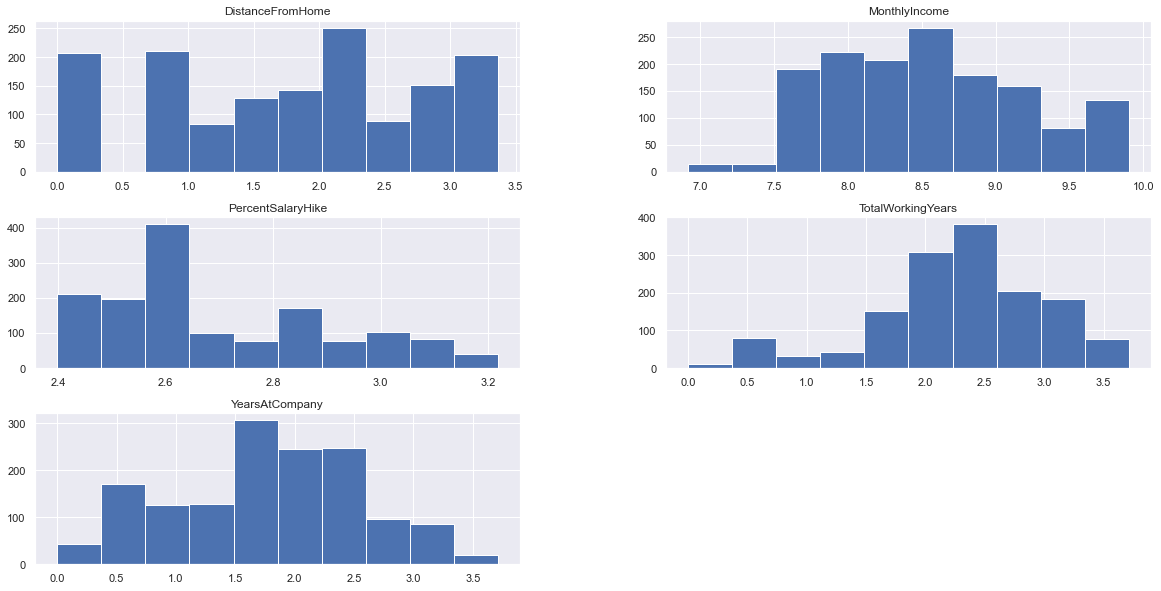

In [205]:
df[trans_features].hist(figsize=(20, 10))
plt.show()

In [206]:
num_features = []

for col in df.columns:
    if df[col].dtype != 'O':
        num_features.append(col)

print(num_features)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [207]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Attrition'] = le.fit_transform(df['Attrition'])

In [208]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [209]:
df.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,0.000000,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,2.079442,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,0.693147,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1


In [210]:
df.drop('Over18', axis=1, inplace=True)

In [239]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [241]:
oversample = SMOTE(sampling_strategy=0.55, random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

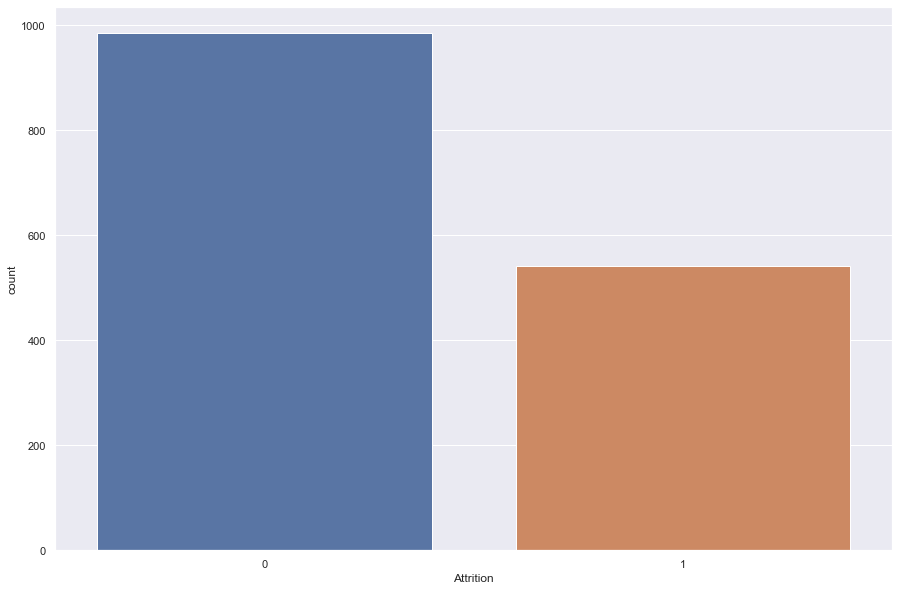

In [242]:
sns.countplot(x=y_smote)
plt.show()

In [247]:
sc = MinMaxScaler()
X_smote[num_features] = sc.fit_transform(X_smote[num_features])
X_test[num_features] = sc.transform(X_test[num_features])

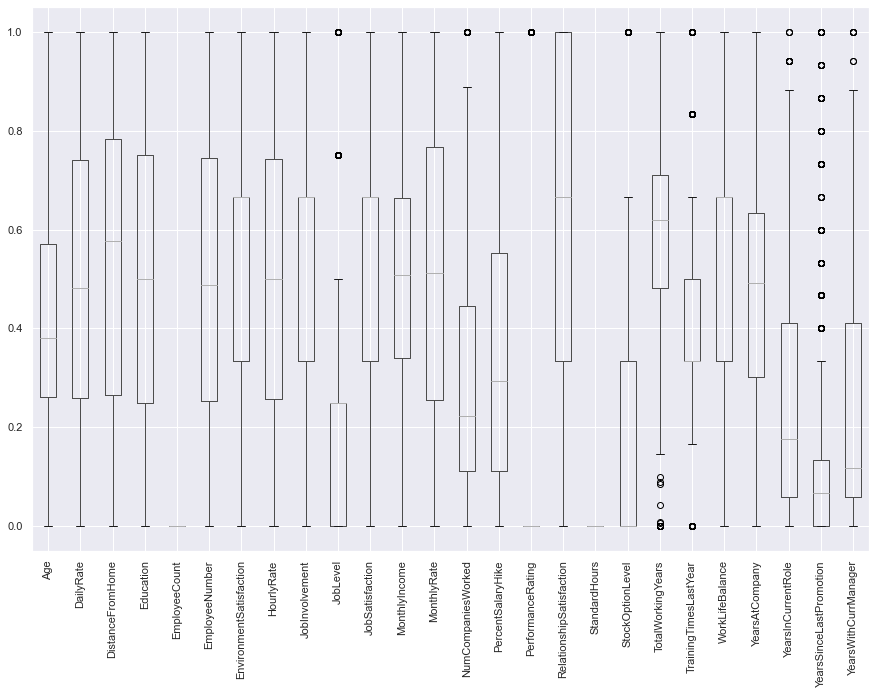

In [248]:
X_smote[num_features].boxplot(figsize=(15, 10))
plt.xticks(rotation=90)
plt.show()

In [249]:
lof = LocalOutlierFactor()
X_train['Outlier'] = lof.fit_predict(X_train[num_features])
outlier_idxs = X_train[X_train.Outlier == -1].index

X_train.Outlier.value_counts(normalize=True)

1    1.0
Name: Outlier, dtype: float64

In [250]:
X_train.drop('Outlier', axis=1, inplace=True)

## Modeling

In [251]:
lr = LogisticRegression(random_state=42)
lr.fit(X_smote, y_smote)
y_pred = lr.predict(X_test)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.67      0.43      0.52        47

    accuracy                           0.87       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.86      0.87      0.86       294



In [220]:
rfecv = RFECV(estimator=lr, cv=5, scoring='f1_macro')
rfecv.fit(X_smote, y_smote)
X_train_rfe = X_smote.iloc[:, rfecv.support_]
X_test_rfe = X_test.iloc[:, rfecv.support_]

In [221]:
lr.fit(X_train_rfe, y_smote)
y_pred = lr.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.65      0.43      0.51        47

    accuracy                           0.87       294
   macro avg       0.77      0.69      0.72       294
weighted avg       0.86      0.87      0.86       294



In [222]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_rfe, y_smote)
y_pred = rfc.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.50      0.21      0.30        47

    accuracy                           0.84       294
   macro avg       0.68      0.59      0.60       294
weighted avg       0.81      0.84      0.81       294



In [223]:
xg = XGBClassifier(random_state=42)
xg.fit(X_train_rfe, y_smote)
y_pred = xg.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



In [224]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_rfe, y_smote)
y_pred = dt.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       247
           1       0.21      0.28      0.24        47

    accuracy                           0.72       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.75      0.72      0.74       294



In [225]:
ad = AdaBoostClassifier(random_state=42)
ad.fit(X_train_rfe, y_smote)
y_pred = ad.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.49      0.40      0.44        47

    accuracy                           0.84       294
   macro avg       0.69      0.66      0.67       294
weighted avg       0.83      0.84      0.83       294



Minimum error:- 0.1326530612244898 at K = 3


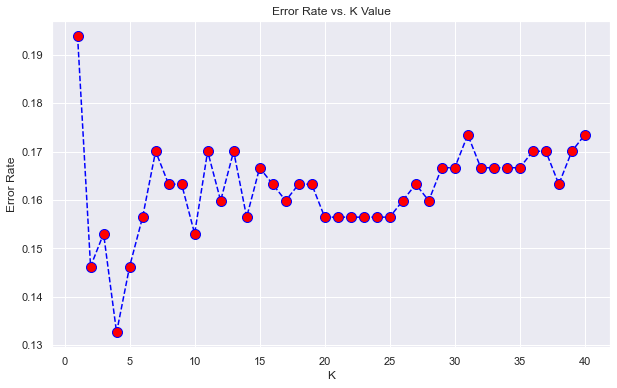

In [226]:
error_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_rfe, y_smote)
    pred_i = knn.predict(X_test_rfe)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [227]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_rfe, y_smote)
y_pred = knn.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.48      0.21      0.29        47

    accuracy                           0.84       294
   macro avg       0.67      0.58      0.60       294
weighted avg       0.80      0.84      0.81       294



In [228]:
gd = GradientBoostingClassifier(random_state=42)
gd.fit(X_train_rfe, y_smote)
y_pred = gd.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [229]:
clf = svm.SVC()
clf.fit(X_train_rfe, y_smote)
y_pred = clf.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.69      0.23      0.35        47

    accuracy                           0.86       294
   macro avg       0.78      0.61      0.64       294
weighted avg       0.84      0.86      0.83       294



In [230]:
ct = CatBoostClassifier(random_state=42, verbose=False)
ct.fit(X_train_rfe, y_smote)
y_pred = ct.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [231]:
grid = {
    'penalty': ['l1', 'l2'],
    'C': [5, 7, 10, 15, 20],
    'solver': ['liblinear', 'lbfgs', 'sag'],
    'max_iter': [20, 25, 30, 35, 40]
}
logreg=LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(logreg, grid, cv=3, scoring='f1_macro', n_jobs=-1,verbose=False)
logreg_cv.fit(X_train_rfe, y_smote)

print("best parameters: ", logreg_cv.best_params_)
print("F1 Score: ", logreg_cv.best_score_)

best parameters:  {'C': 20, 'max_iter': 30, 'penalty': 'l1', 'solver': 'liblinear'}
F1 Score:  0.8392504371634826


C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fi

In [232]:
lr = LogisticRegression(random_state=42, C = 15, max_iter = 30, penalty = 'l2', solver = 'lbfgs')
lr.fit(X_train_rfe, y_smote)
y_pred = lr.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.67      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.78      0.67      0.71       294
weighted avg       0.86      0.87      0.86       294



C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [233]:
grid = {
    'kernel':['linear', 'rbf'], 
    'C':[1, 2, 3], 
    'gamma':['scale', 'auto']
}
svc=svm.SVC()
svm_cv=GridSearchCV(svc, grid, cv=3, scoring='f1_macro', n_jobs=-1)
svm_cv.fit(X_train_rfe, y_smote)

print("best parameters: ", svm_cv.best_params_)
print("F1 Score: ", svm_cv.best_score_)

best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
F1 Score:  0.7815221280823753


In [234]:
svc = svm.SVC(C= 3, gamma= 'scale', kernel= 'rbf')
svc.fit(X_train_rfe, y_smote)
y_pred = svc.predict(X_test_rfe)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.64      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.76      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294

